In [1]:
#import library for analysis
import pandas as pd
#WordNetLemmatizer for reducing inflection in words to their root form
from nltk.stem import WordNetLemmatizer
#stopwords 
from nltk.corpus import stopwords
#splits a string using a regular expression
from nltk.tokenize import RegexpTokenizer
import string

In [2]:
#assigning stop words (english library) to variable
sw = stopwords.words('english')

In [3]:
#read raw GA report
df = pd.read_excel('GA_ANZ_search.xlsx')
df.tail(10)

,SearchTerm
4990,how do i add color on my stickers
4991,how do i add colour to a business card?
4992,how do i add colour to my business card design
4993,how do i add colour to the background
4994,how do i add delivery method?
4995,how do i add documents to my website for download
4996,how do i add embossing to my business card
4997,how do i add express checkout
4998,how do i add express shipping to my order
4999,how do i add eyelets and make this an outdoor ...


In [4]:
#function to remove punctuation from search terms ('.', ',' ect)
def remove_punctuation(text):
    no_punct = ''.join([c for c in text if c not in string.punctuation])
    return no_punct

In [5]:
#applying function row by row
df['SearchTerm'] = df['SearchTerm'].apply(lambda x: remove_punctuation(x))
df['SearchTerm']

0                                                    size
1                                             tax invoice
2                                                template
3                                                shipping
4                                                 payment
                              ...                        
4995    how do i add documents to my website for download
4996           how do i add embossing to my business card
4997                        how do i add express checkout
4998            how do i add express shipping to my order
4999    how do i add eyelets and make this an outdoor ...
Name: SearchTerm, Length: 5000, dtype: object

In [6]:
#split strings
tokenizer = RegexpTokenizer(r'\w+')
df['SearchTerm'] = df['SearchTerm'].apply(lambda x: tokenizer.tokenize(x.lower()))
df['SearchTerm']

0                                                  [size]
1                                          [tax, invoice]
2                                              [template]
3                                              [shipping]
4                                               [payment]
                              ...                        
4995    [how, do, i, add, documents, to, my, website, ...
4996    [how, do, i, add, embossing, to, my, business,...
4997                 [how, do, i, add, express, checkout]
4998    [how, do, i, add, express, shipping, to, my, o...
4999    [how, do, i, add, eyelets, and, make, this, an...
Name: SearchTerm, Length: 5000, dtype: object

In [7]:
#function to remove stop words
def remove_stopwords(text):
    words =  [w for w in text if w not in stopwords.words('english')]
    return words

In [8]:
#applying function row by row
df['SearchTerm'] = df['SearchTerm'].apply(lambda x: remove_stopwords(x))
df['SearchTerm']

0                                      [size]
1                              [tax, invoice]
2                                  [template]
3                                  [shipping]
4                                   [payment]
                        ...                  
4995      [add, documents, website, download]
4996         [add, embossing, business, card]
4997                 [add, express, checkout]
4998          [add, express, shipping, order]
4999    [add, eyelets, make, outdoor, banner]
Name: SearchTerm, Length: 5000, dtype: object

In [9]:
lemmatizer = WordNetLemmatizer()
#function to iterate through the column
def word_lemmatizer(text):
    lem_text = ' '.join([lemmatizer.lemmatize(i) for i in text])
    return lem_text

In [10]:
#lemmatize the word to the word root
df['SearchTerm'] = df['SearchTerm'].apply(lambda x: word_lemmatizer(x))
df['SearchTerm']

0                                 size
1                          tax invoice
2                             template
3                             shipping
4                              payment
                     ...              
4995     add document website download
4996       add embossing business card
4997              add express checkout
4998        add express shipping order
4999    add eyelet make outdoor banner
Name: SearchTerm, Length: 5000, dtype: object

In [11]:
#looping through column and storing values to a list
text = []
for i in df['SearchTerm']:
    text.append(i)

In [14]:
#creating one string in order to visualize a wordcloud
unique_str = (" ").join(text)

In [15]:
#importing wordcloud for visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

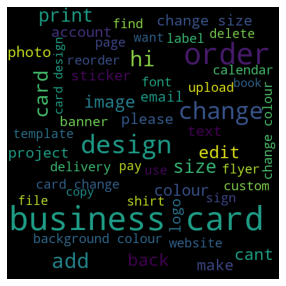

In [16]:
# show 50 words in the wordcloud
wordcloud = WordCloud(width=500, height=500, max_words=50).generate(unique_str)
plt.figure(figsize=(10,5))
# plot the WordCloud image 

plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [17]:
#splitting into multiple strings for barplot visualization
word_list = pd.DataFrame(unique_str.split())

<AxesSubplot:xlabel='0'>

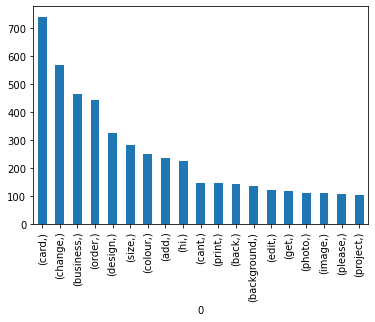

In [18]:
#barplot where count is greater than 100
word_list.value_counts()[word_list.value_counts()>100].plot(kind='bar')

In [19]:
#function to count words
def word_count_func(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [20]:
#applying function to the unique_str
word_count = word_count_func(unique_str)

In [21]:
type(word_count)

dict

In [22]:
#converting dict to a dataframe
search_terms = pd.DataFrame(word_count.items())
#renaming columns
search_terms.columns = ['search_term', 'count']
#sorting dataframe decending and reset index
search_terms_ordered = search_terms.sort_values(['count'], ascending=False).reset_index(drop=True)

In [23]:
#storing top 50 words based on count to variable
ANZ_top50 = search_terms_ordered.head(50)

In [24]:
#saving file as a csv
ANZ_top50.to_csv(r'/users/mzimmermann/Documents/ANZ_search_terms/ANZ_top50.csv', index = False)

In [25]:
#reading orignal GA data to compare with ANZ_top50
df_original = df
df_original.head()

,SearchTerm
0,size
1,tax invoice
2,template
3,shipping
4,payment


In [ ]:
#pull randomly 100 search quereies from the GA raw report. Repalce 'edit' with the search term you want.
pd.options.display.max_rows = 100
pd.set_option('display.max_colwidth', 400)
df_original[df_original['SearchTerm'].str.contains('edit')].sample(n=100)